In [79]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv('../input/train.csv',encoding='latin-1')

In [ ]:
#id: only for test & sample submission files, id for prediction sample identification
#price: price in USD
#carat: weight of the diamond
#cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
#color: diamond colour, from J (worst) to D (best)
#clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
#x: length in mm
#y: width in mm
#z: depth in mm
#depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
#table: width of top of diamond relative to widest point (43--95)

In [38]:
#We will look at the data in order to understand it

In [3]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [4]:
data.shape

(40455, 11)

In [6]:
data.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [7]:
data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [40]:
data=data.drop_duplicates()

In [ ]:
#There are not null values, neither duplicates

In [41]:
data['cut'].value_counts()

Ideal        16250
Premium      10342
Very Good     9026
Good          3639
Fair          1198
Name: cut, dtype: int64

In [43]:
data['color'].value_counts()

G    8565
E    7344
F    7162
H    6147
D    5063
I    4052
J    2122
Name: color, dtype: int64

In [44]:
data['clarity'].value_counts()

SI1     9806
VS2     9204
SI2     6865
VS1     6099
VVS2    3778
VVS1    2776
IF      1365
I1       562
Name: clarity, dtype: int64

In [45]:
data.sort_values(by='price',ascending=False).head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
14955,14955,2.00,Very Good,G,SI1,63.5,56.0,7.90,7.97,5.04,18818
25017,25017,2.07,Ideal,G,SI2,62.5,55.0,8.20,8.13,5.11,18804
14089,14089,2.00,Very Good,H,SI1,62.8,57.0,7.95,8.00,5.01,18803
18387,18387,2.29,Premium,I,SI1,61.8,59.0,8.52,8.45,5.24,18797
5933,5933,2.04,Premium,H,SI1,58.1,60.0,8.37,8.28,4.84,18795
29475,29475,2.00,Premium,I,VS1,60.8,59.0,8.13,8.02,4.91,18795
36991,36991,1.71,Premium,F,VS2,62.3,59.0,7.57,7.53,4.70,18791
20794,20794,2.15,Ideal,G,SI2,62.6,54.0,8.29,8.35,5.21,18791
28955,28955,2.05,Ideal,G,SI1,61.9,57.0,8.10,8.16,5.03,18787
37011,37011,2.05,Premium,F,SI2,60.2,59.0,8.28,8.33,5.00,18784


In [46]:
dataplot=data.sort_values(by='price',ascending=True).reset_index()

In [47]:
dataplot=dataplot.reset_index()

In [ ]:
#We want to check the price of the diamonds, just in case we want to split data according to those values afterwards

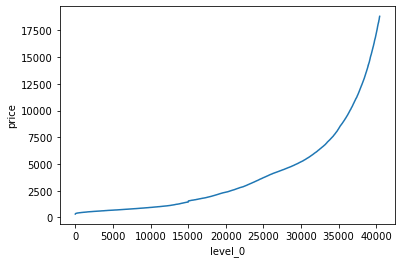

In [48]:
sns.lineplot(dataplot['level_0'],dataplot['price'])

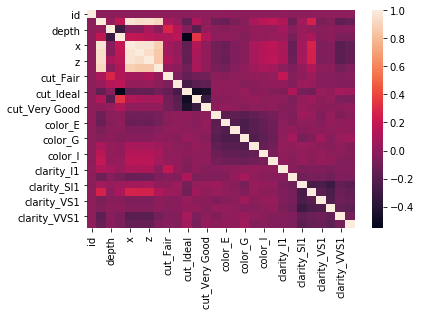

In [49]:
sns.heatmap(pd.get_dummies(data).corr())

In [50]:
y=data['price']

In [51]:
y.head()

0    5363
1    5593
2    3534
3    3212
4     447
Name: price, dtype: int64

In [52]:
X=data.drop(['price','id'],axis=1)

In [53]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10
1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11
2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72
3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56
4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72


In [54]:
X=pd.get_dummies(X)

In [55]:
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.12,61.6,59.0,6.67,6.63,4.10,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1.14,60.0,54.0,6.74,6.97,4.11,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.90,60.3,63.0,6.12,6.22,3.72,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.71,61.9,54.0,5.74,5.76,3.56,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.34,60.0,62.0,4.51,4.55,2.72,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
#We will now train our first prediction model in order to find if we have too many columns in X
# It will be a LinearRegression model

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [64]:
linear_model=LinearRegression()

In [65]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [68]:
linear_model.score(X_train,y_train)

0.919810568429964

In [70]:
y_pred=linear_model.predict(X_train)

In [71]:
y_pred

array([1943.5  ,  635.75 , 2794.25 , ..., 7729.   , 1477.   , 2953.375])

In [80]:
r2_score(y_train,y_pred)

0.919810568429964

In [74]:
mean_squared_error(y_train,y_pred)

1282575.0772313566

In [75]:
#RMSE is the parameter asked at the competition

In [77]:
RMSE=sqrt(mean_squared_error(y_train,y_pred))

In [78]:
RMSE

1132.50831221292